# Random Forest Regressor (not useful/miscellenous)

This code was one of the challenges faced while designing a model. One of the main purpose was to understand how well the traditional data will perform in this dataset. The model has shown underperform while the featured were added, but overfit while removing the key features showing the traditional methodlogy is not suitable for this dataset. This part of the code is just reference and understanding.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



The above code imports train/split function, random forest regressor, linear regressor and mean square error metrics.

In [2]:
data = pd.read_csv('combined.csv')

In [3]:
# Converting to 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data

,County Name,Region Code,Date,Sales volume,Average price All property types,House price index All property types,Property type sales Volume,Average price Detached houses,House price index Detached houses,Semi-Detached House Price,...,Average price Mortgage purchases,Price Mortgage Purchase Index,Mortgage Sales Volume,Average price New build,House price index New build,Sales volume New build,Average price Existing properties,Existing Properties Index,Existing properties Sales Volume,Country
0,Northumberland,E06000057,2020-03-01,404.000000,155435,109.46,404.000000,259856,110.67,147437,...,162018,109.81,239.000000,221320.000000,115.550000,102.000000,151628.000000,109.140000,302.00000,England
1,Northumberland,E06000057,2020-04-01,130.000000,155003,109.16,130.000000,259636,110.58,146895,...,161598,109.53,79.000000,221187.000000,115.480000,16.000000,151112.000000,108.770000,114.00000,England
2,Northumberland,E06000057,2020-05-01,200.000000,153760,108.28,200.000000,258075,109.91,145718,...,160491,108.78,103.000000,222268.000000,116.040000,16.000000,149329.000000,107.490000,184.00000,England
3,Northumberland,E06000057,2020-06-01,330.000000,154870,109.07,330.000000,259207,110.40,146942,...,161594,109.52,181.000000,221985.000000,115.890000,51.000000,150793.000000,108.540000,279.00000,England
4,Northumberland,E06000057,2020-07-01,363.000000,156443,110.17,363.000000,261110,111.21,148521,...,163114,110.55,208.000000,222306.000000,116.060000,38.000000,152706.000000,109.920000,325.00000,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,Monmouthshire,W06000021,2023-12-01,89.000000,335089,160.10,89.000000,479796,161.30,281695,...,344754,160.70,57.000000,469382.000000,169.300000,6.000000,332297.000000,161.200000,83.00000,Wales
6798,Monmouthshire,W06000021,2024-01-01,46.000000,324680,155.10,46.000000,465128,156.40,272810,...,334161,155.80,24.000000,462462.000000,166.800000,5.800000,321759.000000,156.100000,46.00000,Wales
6799,Monmouthshire,W06000021,2024-02-01,35.000000,330831,158.10,35.000000,473739,159.30,278678,...,340967,159.00,9.000000,488274.000000,176.100000,4.600000,326659.000000,158.400000,35.00000,Wales
6800,Monmouthshire,W06000021,2024-03-01,156.777462,335472,160.30,156.777462,480907,161.70,282688,...,345977,161.30,103.366477,250121.631629,145.687794,9.964365,194242.005682,144.215085,148.30303,Wales


In [5]:
# Sorting data by date
data = data.sort_values(by='Date')

The columns below are renamed for easy understanding

In [6]:
# Selecting relevant columns
columns_of_interest = [
    'County Name', 
    'Date', 
    'Average price All property types', 
    'Average price Detached houses', 
    'Semi-Detached House Price', 
    'Terraced House Price',
    'Flats Price'
]
data = data[columns_of_interest]
data.columns = [
    'County', 
    'Date', 
    'All_Property_Types', 
    'Detached', 
    'Semi_Detached',
    'Terraced',
    'Flats'
]


The Features below include date and month and the rest are the target variables  

In [7]:
# Extracting the features and target variables
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [8]:
# Defining function to train models and make predictions
def train_and_predict(data, target_column):
    X = data[['Year', 'Month']]
    y = data[target_column]
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Training Random Forest Regressor model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Generating future dates
    future_dates = pd.date_range(start=data['Date'].max(), periods=13, freq='MS')[1:]
    future_years = future_dates.year
    future_months = future_dates.month
    
    # Creating DataFrame for future predictions
    X_future = pd.DataFrame({'Year': future_years, 'Month': future_months})
    
    # Predicting future prices using Random Forest Regressor
    future_predictions = rf_model.predict(X_future)
    
    # Returning the predictions
    return future_dates, future_predictions

In [9]:
# Prepare a dictionary to store predictions for each county
predictions = {}

In [10]:
# Get unique county names
counties = data['County'].unique()


The code below trains the model and prediction values for each County in the UK

In [11]:

# Train models and make predictions for each county
for county in counties:
    county_data = data[data['County'] == county]
    predictions[county] = {}
    for target in ['All_Property_Types', 'Detached', 'Terraced','Semi_Detached', 'Flats']:
        dates, preds = train_and_predict(county_data, target)
        predictions[county][target] = (dates, preds)

In [12]:
def get_predictions(county_name, predictions):
    if county_name not in predictions:
        return f"Predictions for {county_name} not available."
    
    result = {}
    for target, (dates, preds) in predictions[county_name].items():
        result[target] = pd.DataFrame({
            'Date': dates,
            'Predicted_Price': preds
        })
    return result

Insert the desired County Name below to obtain the predicted prices of the house types:

In [13]:
# Enter a county name; get the predicted values
county_name = 'Greater Manchester'
county_predictions = get_predictions(county_name, predictions)

for property_type, df in county_predictions.items():
    print(f"\nPredicted prices for {property_type} in {county_name}:")
    print(df)


Predicted prices for All_Property_Types in Greater Manchester:
         Date  Predicted_Price
0  2024-05-01        232294.29
1  2024-06-01        232541.40
2  2024-07-01        233680.24
3  2024-08-01        234577.54
4  2024-09-01        235665.91
5  2024-10-01        235743.93
6  2024-11-01        235560.17
7  2024-12-01        235674.47
8  2025-01-01        234723.80
9  2025-02-01        233980.21
10 2025-03-01        233329.02
11 2025-04-01        233421.78

Predicted prices for Detached in Greater Manchester:
         Date  Predicted_Price
0  2024-05-01        394792.00
1  2024-06-01        394546.23
2  2024-07-01        395496.26
3  2024-08-01        396205.73
4  2024-09-01        396853.53
5  2024-10-01        396492.85
6  2024-11-01        396666.70
7  2024-12-01        396804.03
8  2025-01-01        395653.40
9  2025-02-01        394676.33
10 2025-03-01        394414.94
11 2025-04-01        396479.78

Predicted prices for Terraced in Greater Manchester:
         Date  Predict

In [14]:
# Similarly, an example of London
county_name = 'London'
county_predictions = get_predictions(county_name, predictions)

for property_type, df in county_predictions.items():
    print(f"\nPredicted prices for {property_type} in {county_name}:")
    print(df)


Predicted prices for All_Property_Types in London:
         Date  Predicted_Price
0  2024-07-01        519446.75
1  2024-08-01        520151.79
2  2024-09-01        520944.75
3  2024-10-01        519466.99
4  2024-11-01        512106.64
5  2024-12-01        512169.69
6  2025-01-01        514213.70
7  2025-02-01        513457.76
8  2025-03-01        509616.02
9  2025-04-01        508122.75
10 2025-05-01        510788.95
11 2025-06-01        518365.47

Predicted prices for Detached in London:
         Date  Predicted_Price
0  2024-07-01       1028253.22
1  2024-08-01       1029920.18
2  2024-09-01       1029840.63
3  2024-10-01       1027766.66
4  2024-11-01       1020324.62
5  2024-12-01       1019613.79
6  2025-01-01       1014783.18
7  2025-02-01       1014926.90
8  2025-03-01       1008338.74
9  2025-04-01       1000779.44
10 2025-05-01       1002970.07
11 2025-06-01       1022866.06

Predicted prices for Terraced in London:
         Date  Predicted_Price
0  2024-07-01        572110

The code below gives an overall metrics for each and every evaluation metrics that include MAE, MSE, RMSE and R^2 score mentioned in Chapter 3 of the report.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_and_predict(data, target_column):
    X = data[['Year', 'Month']]
    y = data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Regressor model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Evaluation Metrics for {target_column}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    
    # Generate future dates
    future_dates = pd.date_range(start=data['Date'].max(), periods=13, freq='MS')[1:]
    future_years = future_dates.year
    future_months = future_dates.month
    
    # Create a DataFrame for future predictions
    X_future = pd.DataFrame({'Year': future_years, 'Month': future_months})
    
    # Predict future prices using Random Forest Regressor
    future_predictions = rf_model.predict(X_future)
    
    # Return the predictions and evaluation metrics
    return future_dates, future_predictions, mae, mse, rmse, r2



In [16]:
predictions = {}
metrics = {}

for county in counties:
    county_data = data[data['County'] == county]
    predictions[county] = {}
    metrics[county] = {}
    
    for target in ['All_Property_Types', 'Detached', 'Terraced','Semi_Detached', 'Flats']:
        dates, preds, mae, mse, rmse, r2 = train_and_predict(county_data, target)
        predictions[county][target] = (dates, preds)
        metrics[county][target] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}


Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 1505.9590000000055
Mean Squared Error (MSE): 5927525.264410017
Root Mean Squared Error (RMSE): 2434.6509533011126
R-squared (R²): 0.926826270385546
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 2572.967000000004
Mean Squared Error (MSE): 15188075.821109992
Root Mean Squared Error (RMSE): 3897.1881942125906
R-squared (R²): 0.940898736469429
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1287.249000000002
Mean Squared Error (MSE): 3891068.4439499998
Root Mean Squared Error (RMSE): 1972.5791350285544
R-squared (R²): 0.9234324833318769
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 1368.1669999999954
Mean Squared Error (MSE): 5195715.150969988
Root Mean Squared Error (RMSE): 2279.411141275305
R-squared (R²): 0.9352389621063946
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 949.3479999999981
Mean Squared Error (MSE): 1488862.2015000002
Root Mean Squared Error (RMSE): 

Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 2964.472999999998
Mean Squared Error (MSE): 11705656.935470013
Root Mean Squared Error (RMSE): 3421.353085472181
R-squared (R²): 0.9675806855038429
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 5202.643999999995
Mean Squared Error (MSE): 40202423.16157991
Root Mean Squared Error (RMSE): 6340.538081391824
R-squared (R²): 0.9603896306539971
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 2367.957000000001
Mean Squared Error (MSE): 7526974.871789997
Root Mean Squared Error (RMSE): 2743.5332824279712
R-squared (R²): 0.9682500950485213
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 2825.7179999999994
Mean Squared Error (MSE): 10324642.788839964
Root Mean Squared Error (RMSE): 3213.1982181060607
R-squared (R²): 0.9736076393563368
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1852.4089999999997
Mean Squared Error (MSE): 4810979.138709995
Root Mean Squared Error (RMSE): 

Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1492.1550000000018
Mean Squared Error (MSE): 4091946.6094500036
Root Mean Squared Error (RMSE): 2022.856052577643
R-squared (R²): 0.8206637889670573
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 3026.091000000003
Mean Squared Error (MSE): 13407911.05548999
Root Mean Squared Error (RMSE): 3661.6814519411696
R-squared (R²): 0.9427962020110732
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 6350.042999999993
Mean Squared Error (MSE): 59054413.86022999
Root Mean Squared Error (RMSE): 7684.686972169393
R-squared (R²): 0.9155835169257194
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 2240.6550000000047
Mean Squared Error (MSE): 7769767.433210023
Root Mean Squared Error (RMSE): 2787.4302562055295
R-squared (R²): 0.9576691181638866
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 3409.654999999999
Mean Squared Error (MSE): 15552581.278829997
Root Mean Squared Error (RMSE): 

Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 9163.02999999998
Mean Squared Error (MSE): 130310328.38005972
Root Mean Squared Error (RMSE): 11415.35493885581
R-squared (R²): 0.873094463855181
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 3837.398000000004
Mean Squared Error (MSE): 23242010.397159994
Root Mean Squared Error (RMSE): 4820.996826088977
R-squared (R²): 0.8835150298792707
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 5150.979999999999
Mean Squared Error (MSE): 43534275.335419975
Root Mean Squared Error (RMSE): 6598.050873964217
R-squared (R²): 0.8795908050335628
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 2068.571999999994
Mean Squared Error (MSE): 7544618.483039977
Root Mean Squared Error (RMSE): 2746.7468909675636
R-squared (R²): 0.782554003893648
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 3953.6439999999943
Mean Squared Error (MSE): 43714416.13413988
Root Mean Squared Error (RMSE): 6611

Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 3599.75
Mean Squared Error (MSE): 16683826.735960001
Root Mean Squared Error (RMSE): 4084.584034630699
R-squared (R²): 0.965808077201223
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1351.1390000000015
Mean Squared Error (MSE): 2420353.9547900073
Root Mean Squared Error (RMSE): 1555.7486798291063
R-squared (R²): 0.978197258966164
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 1463.6130000000062
Mean Squared Error (MSE): 2775720.84517002
Root Mean Squared Error (RMSE): 1666.0494726057868
R-squared (R²): 0.985364679946932
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 632.8960000000021
Mean Squared Error (MSE): 537240.5497400025
Root Mean Squared Error (RMSE): 732.9669499643231
R-squared (R²): 0.9711505371267072
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 1878.0674999999987
Mean Squared Error (MSE): 6893826.626874986
Root Mean Squared Error (RMSE): 2625.60976286

Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 1635.022999999998
Mean Squared Error (MSE): 4263568.841869997
Root Mean Squared Error (RMSE): 2064.841117827228
R-squared (R²): 0.9112427136894582
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 2458.255000000002
Mean Squared Error (MSE): 9754977.198730035
Root Mean Squared Error (RMSE): 3123.2958871567125
R-squared (R²): 0.9336036258649159
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1285.9829999999972
Mean Squared Error (MSE): 2847984.5139299957
Root Mean Squared Error (RMSE): 1687.5972605838147
R-squared (R²): 0.8978703817300746
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 1638.3530000000028
Mean Squared Error (MSE): 4308994.814010009
Root Mean Squared Error (RMSE): 2075.811844558656
R-squared (R²): 0.9222290787333798
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 965.6690000000017
Mean Squared Error (MSE): 1540048.1945500043
Root Mean Squared Error (RMSE): 

Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 5836.858000000007
Mean Squared Error (MSE): 60905902.16545995
Root Mean Squared Error (RMSE): 7804.223354406251
R-squared (R²): 0.9191226581861982
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 2825.680999999997
Mean Squared Error (MSE): 15895055.421650002
Root Mean Squared Error (RMSE): 3986.86034639414
R-squared (R²): 0.92289717176604
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 3528.294000000003
Mean Squared Error (MSE): 19393411.251580063
Root Mean Squared Error (RMSE): 4403.795096457153
R-squared (R²): 0.9413392619983576
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1912.9859999999985
Mean Squared Error (MSE): 8955235.12172001
Root Mean Squared Error (RMSE): 2992.5298865207697
R-squared (R²): 0.8373966659865945
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 1167.7660000000003
Mean Squared Error (MSE): 2689312.1479399954
Root Mean Squared Error (RMSE): 1639

Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1057.8809999999999
Mean Squared Error (MSE): 1688209.1190899995
Root Mean Squared Error (RMSE): 1299.311017074049
R-squared (R²): 0.9678035342947795
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 984.8450000000012
Mean Squared Error (MSE): 1416744.4067700007
Root Mean Squared Error (RMSE): 1190.270728351328
R-squared (R²): 0.9842855138364057
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 645.7479999999996
Mean Squared Error (MSE): 746421.7896600002
Root Mean Squared Error (RMSE): 863.9570531340087
R-squared (R²): 0.9236012315175187
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 2538.6279999999997
Mean Squared Error (MSE): 9391323.606719997
Root Mean Squared Error (RMSE): 3064.5266529629002
R-squared (R²): 0.9056327305750026
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 3382.976999999996
Mean Squared Error (MSE): 15288667.13008996
Root Mean Squared Error (RMSE): 3

Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1887.9880000000035
Mean Squared Error (MSE): 5313695.759700005
Root Mean Squared Error (RMSE): 2305.1454964275044
R-squared (R²): 0.975354104520486
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 2941.398999999999
Mean Squared Error (MSE): 11704439.656370008
Root Mean Squared Error (RMSE): 3421.1751864483654
R-squared (R²): 0.9699212588436184
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1427.0339999999997
Mean Squared Error (MSE): 3003858.8110999926
Root Mean Squared Error (RMSE): 1733.164392404827
R-squared (R²): 0.9353616396083824
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 2256.4459999999963
Mean Squared Error (MSE): 9151670.195339981
Root Mean Squared Error (RMSE): 3025.1727546274083
R-squared (R²): 0.9297818793540247
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 4962.575000000006
Mean Squared Error (MSE): 37766332.70227007
Root Mean Squared Error (RMSE):

Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 3775.5179999999937
Mean Squared Error (MSE): 18110550.480999965
Root Mean Squared Error (RMSE): 4255.649243182521
R-squared (R²): 0.9295850499958843
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1965.0380000000034
Mean Squared Error (MSE): 5870953.140560018
Root Mean Squared Error (RMSE): 2423.004981538424
R-squared (R²): 0.8536175018565644
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 3860.189000000001
Mean Squared Error (MSE): 20095021.266829982
Root Mean Squared Error (RMSE): 4482.747067014821
R-squared (R²): 0.8837510547625733
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 5319.717000000004
Mean Squared Error (MSE): 37331744.829430066
Root Mean Squared Error (RMSE): 6109.970935236113
R-squared (R²): 0.8802088597493776
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 2565.5190000000002
Mean Squared Error (MSE): 9242277.353169989
Root Mean Squared Error (RMSE): 

Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1679.737000000001
Mean Squared Error (MSE): 6317852.3208500035
Root Mean Squared Error (RMSE): 2513.533831252327
R-squared (R²): 0.7573075912839582
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 3877.387000000005
Mean Squared Error (MSE): 19694916.754410032
Root Mean Squared Error (RMSE): 4437.8955321649955
R-squared (R²): 0.9119828533846861
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 5592.525999999989
Mean Squared Error (MSE): 39627381.90351987
Root Mean Squared Error (RMSE): 6295.028348110902
R-squared (R²): 0.9129430785669289
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 2987.850999999998
Mean Squared Error (MSE): 12064749.075949986
Root Mean Squared Error (RMSE): 3473.4347663300064
R-squared (R²): 0.9031864331019782
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 3247.323000000004
Mean Squared Error (MSE): 13896196.191730028
Root Mean Squared Error (RMSE): 

Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1212.618999999998
Mean Squared Error (MSE): 4576317.20654999
Root Mean Squared Error (RMSE): 2139.2328546817876
R-squared (R²): 0.7243221879101907
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 2311.670000000001
Mean Squared Error (MSE): 7439098.226280008
Root Mean Squared Error (RMSE): 2727.4710312448797
R-squared (R²): 0.952775283966589
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 3812.161999999994
Mean Squared Error (MSE): 19220183.610219974
Root Mean Squared Error (RMSE): 4384.082983956847
R-squared (R²): 0.9551609058073367
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1923.9260000000008
Mean Squared Error (MSE): 5367351.2597200135
Root Mean Squared Error (RMSE): 2316.7544668609175
R-squared (R²): 0.9476971508472333
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 2249.9600000000005
Mean Squared Error (MSE): 7042850.096580009
Root Mean Squared Error (RMSE): 2

Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 3699.1160000000004
Mean Squared Error (MSE): 18956329.93341999
Root Mean Squared Error (RMSE): 4353.886761667096
R-squared (R²): 0.8807207145029329
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1939.434999999999
Mean Squared Error (MSE): 5097090.457269998
Root Mean Squared Error (RMSE): 2257.67368263662
R-squared (R²): 0.8697890490135098
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 2155.9739999999993
Mean Squared Error (MSE): 6662830.706359989
Root Mean Squared Error (RMSE): 2581.24596006657
R-squared (R²): 0.9003255417704566
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1125.9800000000002
Mean Squared Error (MSE): 1984744.276740002
Root Mean Squared Error (RMSE): 1408.8095246483826
R-squared (R²): 0.8444598729248503
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 2367.370000000004
Mean Squared Error (MSE): 9551079.064360026
Root Mean Squared Error (RMSE): 3090

Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 3646.25799999999
Mean Squared Error (MSE): 18486246.422939904
Root Mean Squared Error (RMSE): 4299.563515397802
R-squared (R²): 0.9501829332872457
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1741.9869999999967
Mean Squared Error (MSE): 5368803.173189992
Root Mean Squared Error (RMSE): 2317.067796416409
R-squared (R²): 0.853811006332359
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 3930.8919999999985
Mean Squared Error (MSE): 26744951.549299978
Root Mean Squared Error (RMSE): 5171.552141214471
R-squared (R²): 0.932412683250807
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 10946.356999999995
Mean Squared Error (MSE): 207709999.42680988
Root Mean Squared Error (RMSE): 14412.147634090135
R-squared (R²): 0.8785367672225846
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 3051.2859999999987
Mean Squared Error (MSE): 19290893.513199933
Root Mean Squared Error (RMSE): 

Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 3237.4270000000047
Mean Squared Error (MSE): 14385588.981930032
Root Mean Squared Error (RMSE): 3792.8338985420955
R-squared (R²): 0.9391336346084007
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 4101.907000000001
Mean Squared Error (MSE): 22276011.468089975
Root Mean Squared Error (RMSE): 4719.746970769723
R-squared (R²): 0.9449874071584886
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1897.9729999999981
Mean Squared Error (MSE): 5725252.894689993
Root Mean Squared Error (RMSE): 2392.7500694159417
R-squared (R²): 0.8982797779306176
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 6409.713000000003
Mean Squared Error (MSE): 57407411.08251004
Root Mean Squared Error (RMSE): 7576.767851961022
R-squared (R²): 0.7351076918115371
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 8307.591
Mean Squared Error (MSE): 92846635.88295001
Root Mean Squared Error (RMSE): 9635.6959

Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 2602.6890000000044
Mean Squared Error (MSE): 11798622.397230024
Root Mean Squared Error (RMSE): 3434.9122837752384
R-squared (R²): 0.8986613050574648
Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 1154.4299999999973
Mean Squared Error (MSE): 2523717.697779996
Root Mean Squared Error (RMSE): 1588.6213198179091
R-squared (R²): 0.8506576751634954
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 2512.734999999998
Mean Squared Error (MSE): 11780642.39884996
Root Mean Squared Error (RMSE): 3432.2940431801526
R-squared (R²): 0.8951033902141187
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 4001.368000000005
Mean Squared Error (MSE): 31542562.69094
Root Mean Squared Error (RMSE): 5616.276586043462
R-squared (R²): 0.9266601279061438
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 1734.600999999998
Mean Squared Error (MSE): 5151144.61371
Root Mean Squared Error (RMSE): 2269.61

Evaluation Metrics for Flats:
Mean Absolute Error (MAE): 2404.714
Mean Squared Error (MSE): 10736917.689420002
Root Mean Squared Error (RMSE): 3276.7236211526906
R-squared (R²): 0.8657933224092569
Evaluation Metrics for All_Property_Types:
Mean Absolute Error (MAE): 891.7229999999981
Mean Squared Error (MSE): 1228051.3825699934
Root Mean Squared Error (RMSE): 1108.1747978410235
R-squared (R²): 0.9569478696522954
Evaluation Metrics for Detached:
Mean Absolute Error (MAE): 1621.9799999999989
Mean Squared Error (MSE): 4015426.6078600003
Root Mean Squared Error (RMSE): 2003.852940677035
R-squared (R²): 0.9512641291602875
Evaluation Metrics for Terraced:
Mean Absolute Error (MAE): 694.525
Mean Squared Error (MSE): 782012.6977699983
Root Mean Squared Error (RMSE): 884.3148182463067
R-squared (R²): 0.9581032075603994
Evaluation Metrics for Semi_Detached:
Mean Absolute Error (MAE): 887.0959999999992
Mean Squared Error (MSE): 1270630.0854799955
Root Mean Squared Error (RMSE): 1127.22228751919
R

In [17]:
county_name = 'Greater Manchester'
county_metrics = metrics[county_name]

for property_type, metric_values in county_metrics.items():
    print(f"\nMetrics for {property_type} in {county_name}:")
    print(metric_values)

    #Get Metrics County wise 


Metrics for All_Property_Types in Greater Manchester:
{'MAE': 1219.1809999999998, 'MSE': 2020910.7984100066, 'RMSE': 1421.587422007527, 'R²': 0.9868873354490605}

Metrics for Detached in Greater Manchester:
{'MAE': 2354.877999999991, 'MSE': 7981799.039479958, 'RMSE': 2825.2077869565555, 'R²': 0.9844078357464117}

Metrics for Terraced in Greater Manchester:
{'MAE': 1127.8419999999983, 'MSE': 1554083.625679996, 'RMSE': 1246.6289045582073, 'R²': 0.9853733990398343}

Metrics for Semi_Detached in Greater Manchester:
{'MAE': 1338.4989999999932, 'MSE': 2637145.0079899775, 'RMSE': 1623.9288802130397, 'R²': 0.9879484886950051}

Metrics for Flats in Greater Manchester:
{'MAE': 626.6439999999973, 'MSE': 724627.5968399979, 'RMSE': 851.2506075416322, 'R²': 0.9802900013036256}


The code below calcuates for overall dataset and gives out an aggregate value

In [18]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_and_predict(data, target_column):
    X = data[['Year', 'Month']]
    y = data[target_column]
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Training Random Forest Regressor model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = rf_model.predict(X_test)
    
    # Generating future dates
    future_dates = pd.date_range(start=data['Date'].max(), periods=13, freq='MS')[1:]
    future_years = future_dates.year
    future_months = future_dates.month
    
    # Creating DataFrame for future predictions
    X_future = pd.DataFrame({'Year': future_years, 'Month': future_months})
    
    # Predicting future prices using Random Forest Regressor
    future_predictions = rf_model.predict(X_future)
    
    # Returning the predictions, actual values, and test predictions for metric calculation
    return future_dates, future_predictions, y_test, y_pred


In [19]:
all_y_test = []
all_y_pred = []

for county in counties:
    county_data = data[data['County'] == county]
    
    for target in ['All_Property_Types', 'Detached', 'Terraced','Semi_Detached', 'Flats']:
        _, _, y_test, y_pred = train_and_predict(county_data, target)
        
        # Appending the actual and predicted values for aggregation
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

# Converting lists to arrays for metric calculations
all_y_test = np.array(all_y_test)
all_y_pred = np.array(all_y_pred)


In [20]:
# Calculating the overall evaluation metrics
overall_mae = mean_absolute_error(all_y_test, all_y_pred)
overall_mse = mean_squared_error(all_y_test, all_y_pred)
overall_rmse = np.sqrt(overall_mse)
overall_r2 = r2_score(all_y_test, all_y_pred)

# Displaying the overall metrics
print("Overall Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {overall_mae}")
print(f"Mean Squared Error (MSE): {overall_mse}")
print(f"Root Mean Squared Error (RMSE): {overall_rmse}")
print(f"R-squared (R²): {overall_r2}")

#Gives insights on the results of the model

Overall Evaluation Metrics:
Mean Absolute Error (MAE): 2779.712746509919
Mean Squared Error (MSE): 17806604.35820291
Root Mean Squared Error (RMSE): 4219.787240869249
R-squared (R²): 0.9990482724845823


The score above clearly shows the results to be overfitting as the R^2 score of 0.999 is too good to be true and in testing data, the performance is really bad. Due to this reason, Random forest cannot be taken as a reliable model to train this dataset. 

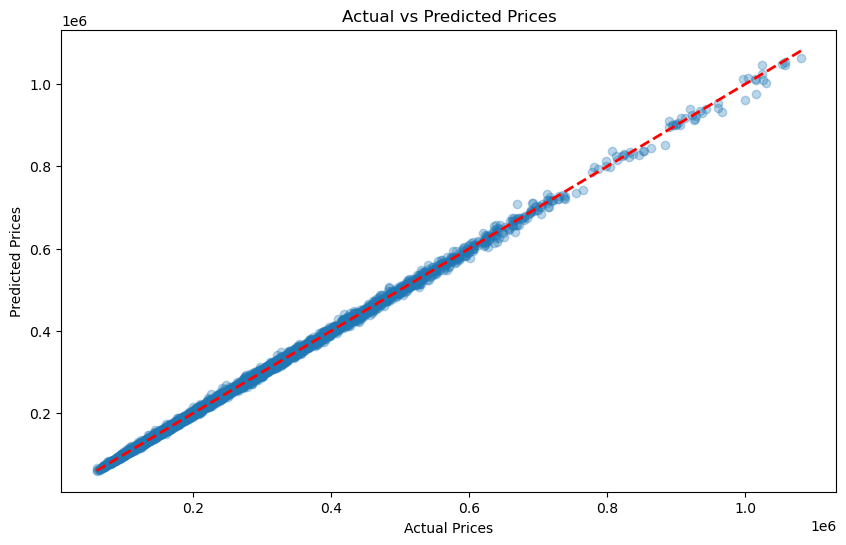

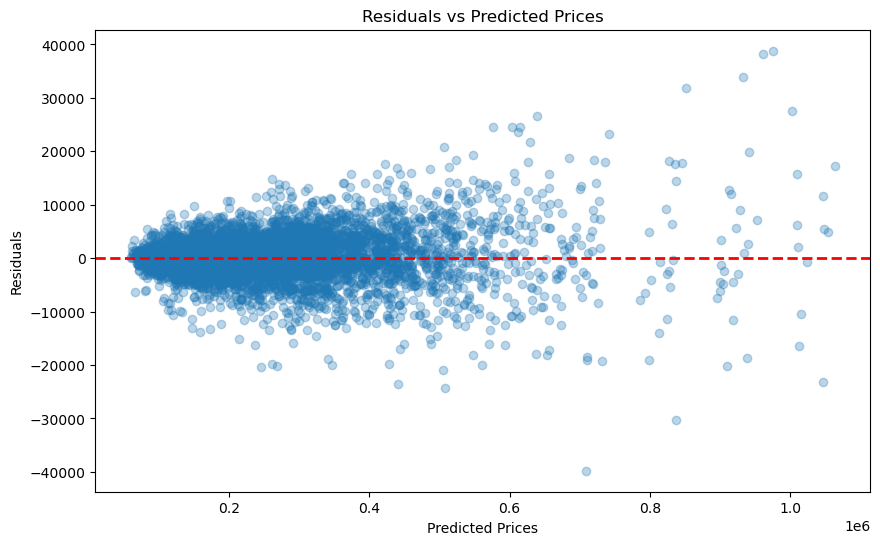

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating predictions and actual values across all counties and property types
all_y_test = []
all_y_pred = []

for county in counties:
    county_data = data[data['County'] == county]
    
    for target in ['All_Property_Types', 'Detached', 'Terraced','Semi_Detached', 'Flats']:
        _, _, y_test, y_pred = train_and_predict(county_data, target)
        
        # Appending the actual and predicted values for aggregation
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

# Converting lists to arrays for easier plotting
all_y_test = np.array(all_y_test)
all_y_pred = np.array(all_y_pred)

# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(all_y_test, all_y_pred, alpha=0.3)
plt.plot([all_y_test.min(), all_y_test.max()], [all_y_test.min(), all_y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Residual Plot
residuals = all_y_test - all_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(all_y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

#The plot below shows how well the values are fitting on the horizontal line showing the model cannot perform well on the testing data!!